In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv("googleplaystore.csv")
dataUserReview = pd.read_csv("googleplaystore_user_reviews.csv")

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
for i in range(len(data['Reviews'])):
    if 'M' in data['Reviews'][i]:
        data['Reviews'][i] = data['Reviews'][i][:-1]
        #print(data['Reviews'][i])
        data['Reviews'][i] = float(data['Reviews'][i]) * 1e6
    else:
        data['Reviews'][i] = float(data['Reviews'][i])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [91]:
data.sort_values(by = 'Reviews', ascending = False).iloc[0]['App']


'Facebook'

In [5]:
freeApps = len(data[data['Type'] == 'Free'])
paidApps = len(data) - freeApps
print("No. of paid apps = ", paidApps)
print("No. of free apps = ", freeApps)

No. of paid apps =  802
No. of free apps =  10039


In [93]:
appInst = data.sort_values(by = 'Installs', ascending = False).head(10)


In [94]:
appInst 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3e+06,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,1.77148e+07,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,1.07903e+07,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
3767,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1.28402e+06,Varies with device,"500,000,000+",Free,0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.1,282460,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device
3326,Gboard - the Google Keyboard,TOOLS,4.2,1.85911e+06,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
431,Viber Messenger,COMMUNICATION,4.3,1.1335e+07,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
4222,imo free video calls and chat,COMMUNICATION,4.3,4.78589e+06,11M,"500,000,000+",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
3235,Google Translate,TOOLS,4.4,5.74509e+06,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device
1842,Candy Crush Saga,GAME,4.4,2.24297e+07,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


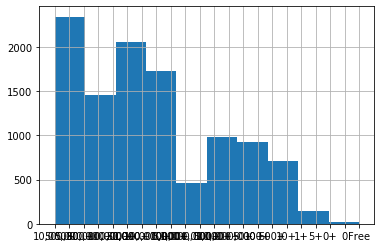

In [6]:
data["Installs"].hist()
plt.show()


In [15]:
data["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

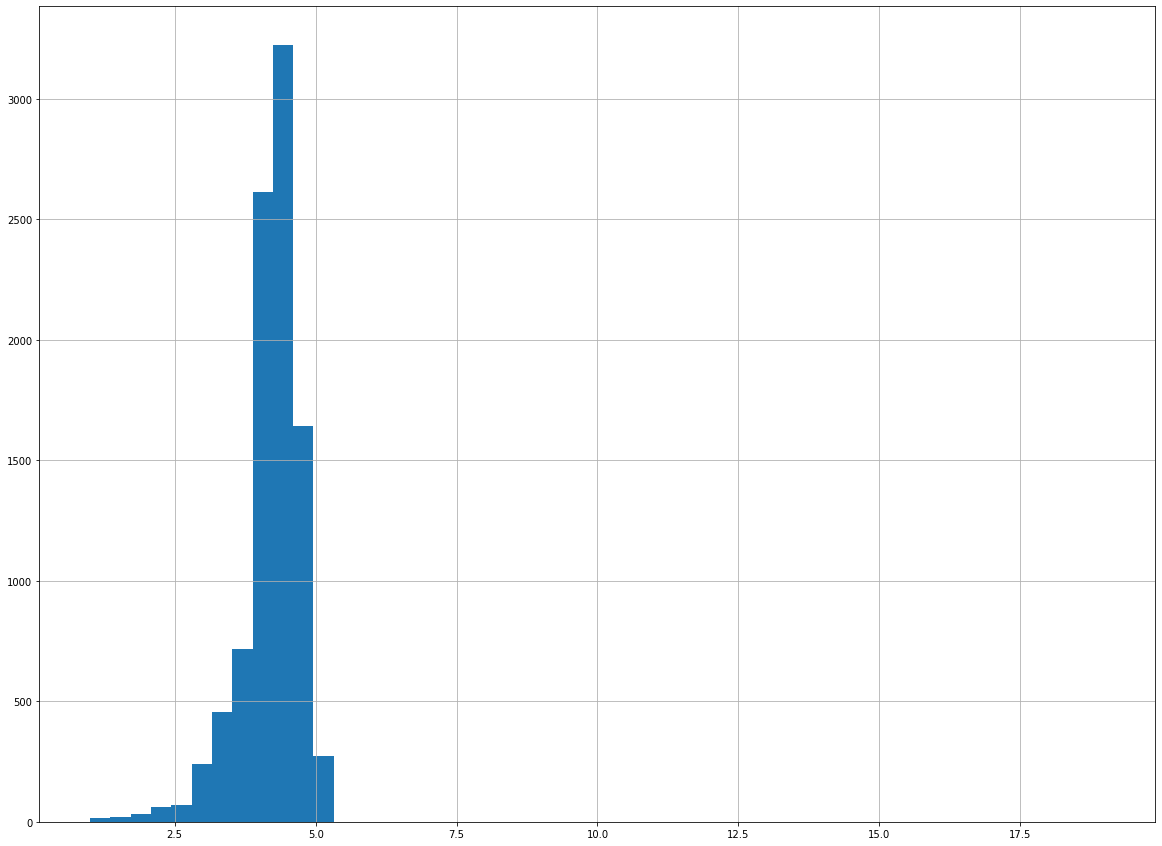

In [7]:
data["Rating"].hist(bins=50, figsize=(20,15))
plt.show()

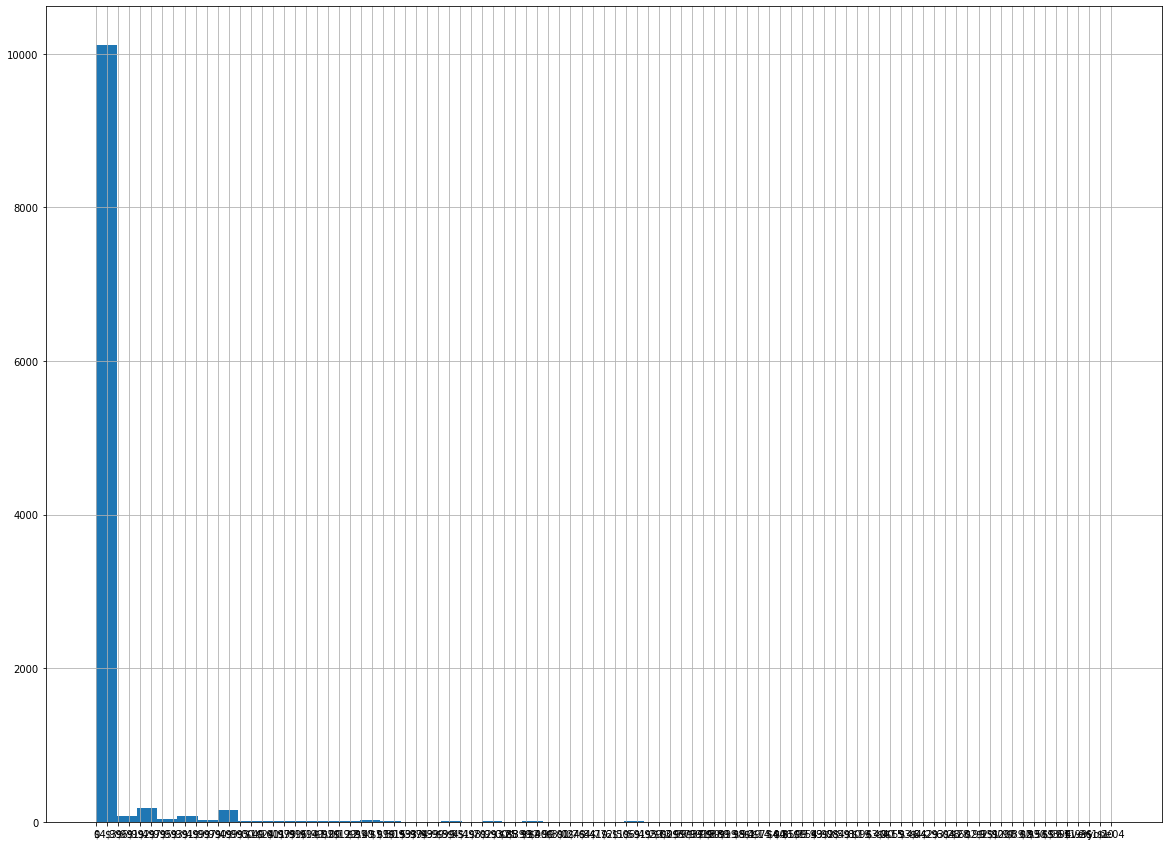

In [11]:
data["Price"].hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
data["Price"].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$394.99        1
$2.60          1
$1.29          1
$1.76          1
$1.61          1
Name: Price, Length: 93, dtype: int64

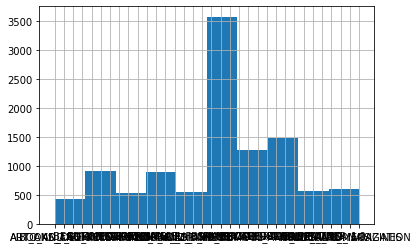

In [12]:
data["Category"].hist()
plt.show()

In [13]:
data["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [29]:
data.sort_values(by = '', ascending = False).iloc[0]['App']


'Life Made WI-Fi Touchscreen Photo Frame'

In [25]:
for i in range(len(data['Installs'])):
    if("+" in data['Installs'][i]):
        data['Installs'][i] =data['Installs'][i][:-1]
        while(',' in data['Installs'][i]):
            idx = data['Installs'][i].index(',')
            data['Installs'][i] = data['Installs'][i][:idx] + data['Installs'][i][idx+1:]
        data['Installs'][i] = int(data['Installs'][i])
    if(data['Installs'][i] == 'Free'):
        data['Installs'][i] = 0
    data['Installs'][i] = int(data['Installs'][i])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Us

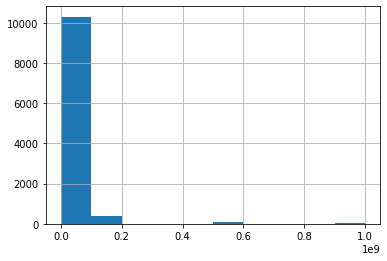

In [98]:
data["Installs"].hist()
plt.show()

In [107]:
data["Installs"].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: Installs, dtype: int64

In [99]:
Spr = data["Installs"].var()
print("Spredningen for Installs Data")
print(Spr)

Spredningen for Installs Data
7229347385244384.0


In [100]:
mid = data["Installs"].mean()
print("Middelværdien for Installs Data")
print(mid)

Middelværdien for Installs Data
15462912.414629648


In [101]:
med = data["Installs"].median()
print("Median")
print(med)

Median
100000.0


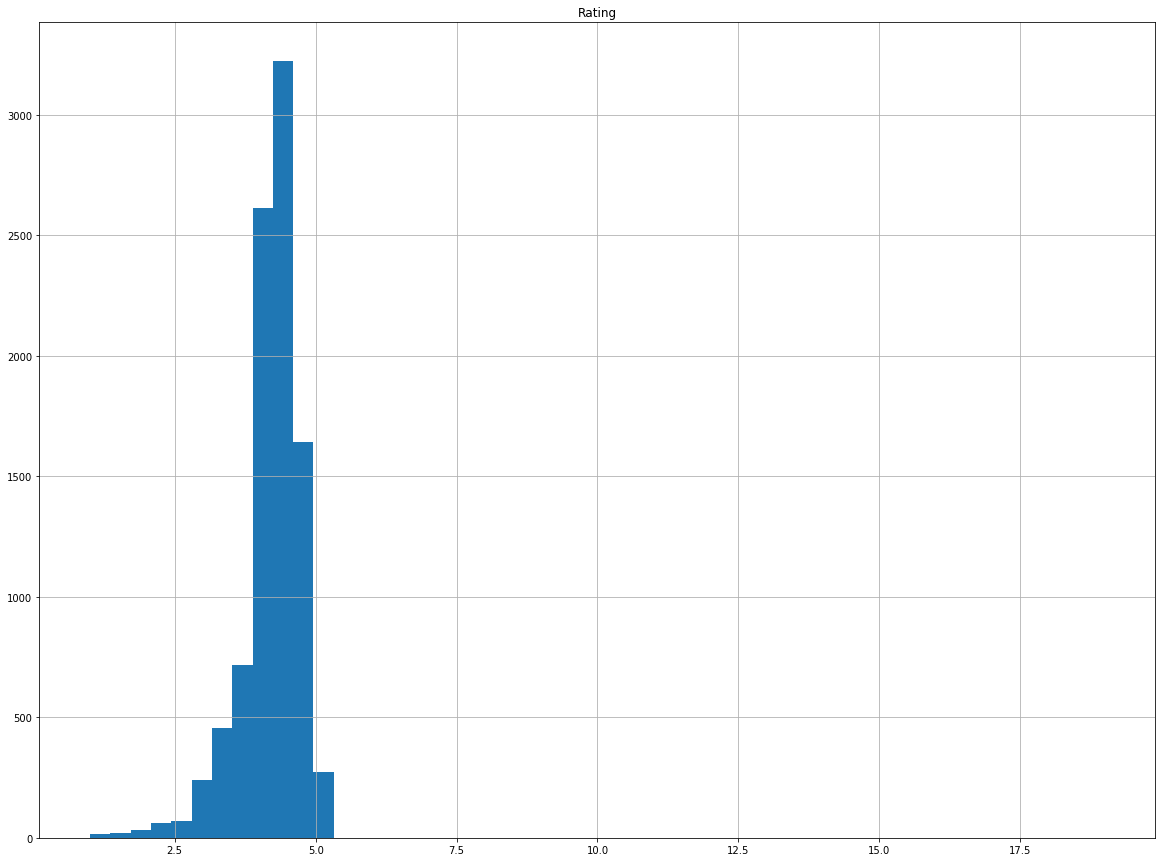

In [105]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [110]:
corr_matrix = data.corr()
corr_matrix["Installs"].sort_values(ascending=False)

KeyError: 'Installs'